In [96]:
# NumPy is used for numerical operations and array handling
import numpy as np

# Pandas is used for data manipulation and analysis
import pandas as pd

# Matplotlib's pyplot module provides a MATLAB-like plotting framework
import matplotlib.pyplot as plt

# Seaborn is based on matplotlib and provides a high-level interface for drawing attractive statistical graphics
import seaborn as sns

# Plotly Express is a terse, consistent, high-level API for creating figures
import plotly.express as px

# Pathlib provides classes representing filesystem paths with semantics appropriate for different operating systems
from pathlib import Path

# train_test_split is a utility function to split data arrays into two subsets: for training data and for testing data
from sklearn.model_selection import train_test_split

# TensorFlow is an open source library for machine learning and artificial intelligence
import tensorflow as tf

# confusion_matrix and classification_report are tools to evaluate the accuracy of a classification
from sklearn.metrics import confusion_matrix, classification_report


In [97]:
%pwd


'C:\\Users\\ayoos'

In [83]:
#adding images from directories
positive_dir=Path(r'C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\Positive')
negative_dir=Path(r'C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\Negative')

In [84]:
def generate_df(image_dir, label):
    # Generate a Pandas Series of file paths for JPEG images in the given directory, converting paths to strings
    filepaths = pd.Series(list(image_dir.glob(r'*.jpg')), name='Filepath').astype(str)
    
    # Create a Pandas Series for labels, using the same index as the filepaths
    labels = pd.Series(label, name='Label', index=filepaths.index)
    
    # Concatenate the filepaths and labels into a single dataframe
    df = pd.concat([filepaths, labels], axis=1)
    
    # Return the created dataframe
    return df


In [85]:
# Create a DataFrame for images in the positive directory with each image labeled as "POSITIVE"
positive_df = generate_df(positive_dir, label="POSITIVE")

# Create a DataFrame for images in the negative directory with each image labeled as "NEGATIVE"
negative_df = generate_df(negative_dir, label="NEGATIVE")


In [86]:
# Combine positive and negative dataframes, shuffle the resulting dataframe, and reset the index
all_df = pd.concat([positive_df, negative_df], axis=0) \
    .sample(frac=1.0, random_state=1) \
    .reset_index(drop=True)
all_df


Filepath     Label
0      C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  POSITIVE
1      C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  POSITIVE
2      C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  POSITIVE
3      C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  NEGATIVE
4      C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  POSITIVE
...                                                  ...       ...
39995  C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  POSITIVE
39996  C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  NEGATIVE
39997  C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  POSITIVE
39998  C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  POSITIVE
39999  C:\Users\ayoos\Desktop\CONCRETE CRACK\Dataset\...  NEGATIVE

[40000 rows x 2 columns]

In [87]:
# Display the summary of the DataFrame
print(all_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filepath  40000 non-null  object
 1   Label     40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB
None


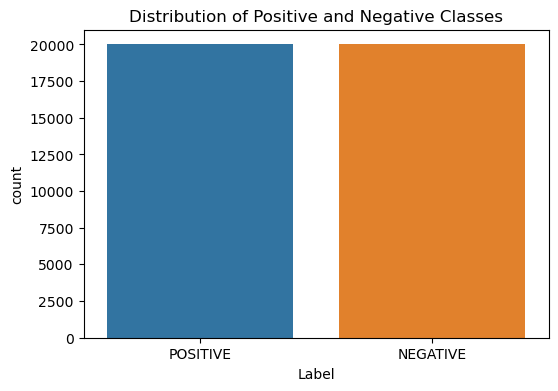

In [88]:
# Plotting the distribution of labels
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=all_df)
plt.title('Distribution of Positive and Negative Classes')
plt.show()


Showing Positive Images:


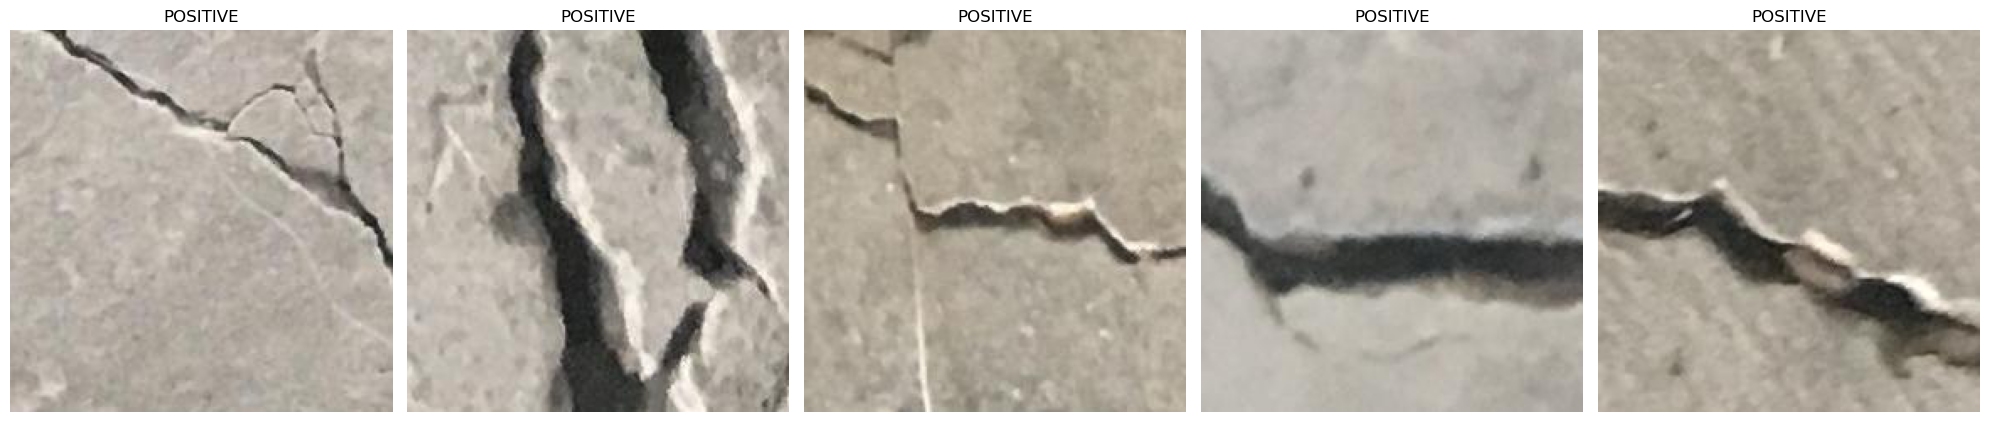

Showing Negative Images:


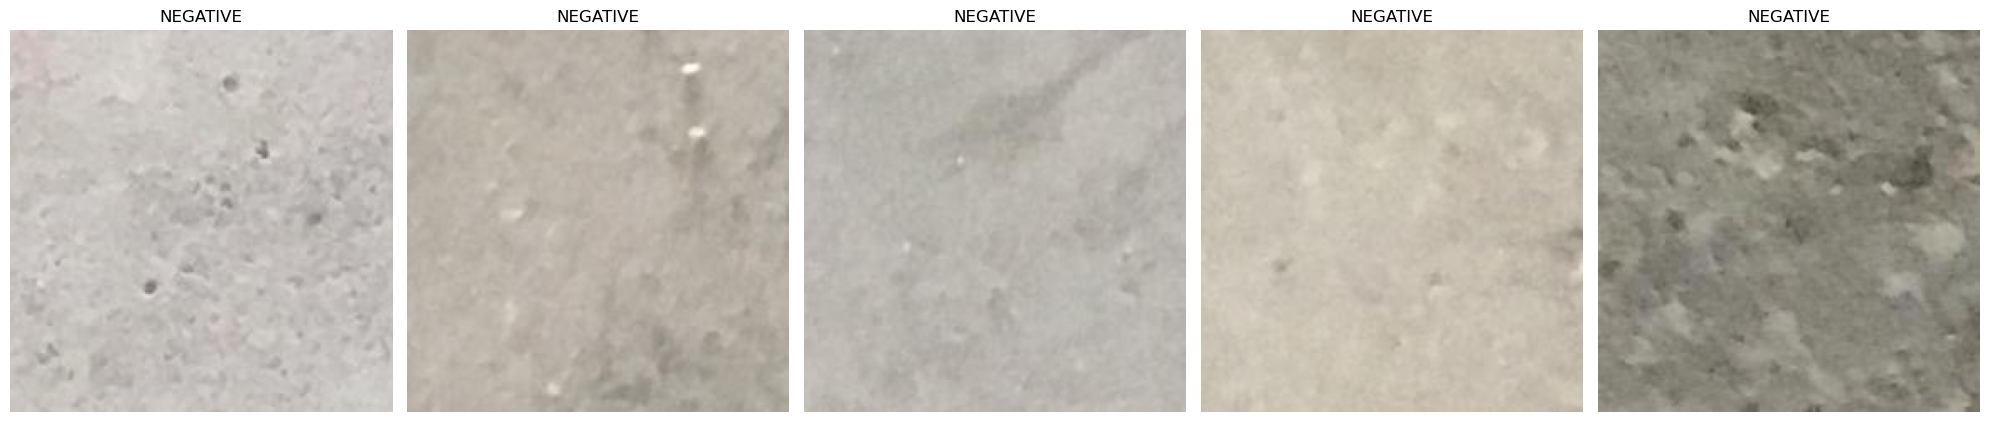

In [89]:
from PIL import Image


def show_images(dataframe, n_images=5):
    # Create a figure with subplots arranged in 1 row and n_images columns, with a specified figure size
    fig, axes = plt.subplots(1, n_images, figsize=(20, 10))
    
    # Loop over each subplot and populate it with an image from the dataframe
    for i, ax in enumerate(axes.flat):
        # Open an image file from the path specified in the dataframe
        img = Image.open(dataframe.iloc[i]['Filepath'])
        # Display the image in the subplot
        ax.imshow(img)
        # Set the title of the subplot to the label of the image
        ax.set_title(dataframe.iloc[i]['Label'])
        # Hide axes ticks
        ax.axis('off')
    
    # Adjust the layout to prevent overlap
    plt.tight_layout()
    # Display the figure with the images
    plt.show()
    
# Show images from the positive category
print("Showing Positive Images:")
show_images(all_df[all_df['Label'] == 'POSITIVE'])

# Show images from the negative category
print("Showing Negative Images:")
show_images(all_df[all_df['Label'] == 'NEGATIVE'])


dimensions
(227, 227)    40000
Name: count, dtype: int64


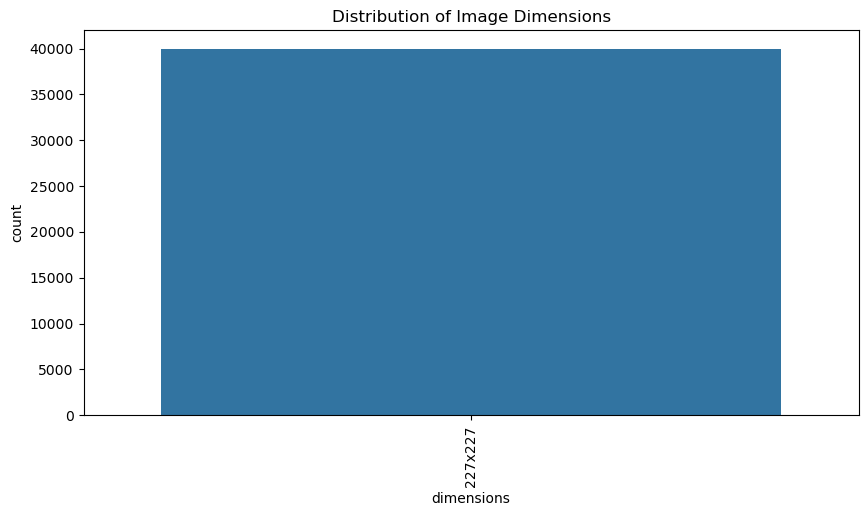

In [79]:
# Analyze image sizes
all_df['dimensions'] = all_df['Filepath'].apply(lambda x: Image.open(x).size)
print(all_df['dimensions'].value_counts())

# Visualize the distribution of image dimensions
image_sizes = all_df['dimensions'].apply(lambda x: "{}x{}".format(x[0], x[1]))
plt.figure(figsize=(10, 5))
sns.countplot(x=image_sizes)
plt.title('Distribution of Image Dimensions')
plt.xticks(rotation=90)
plt.show()


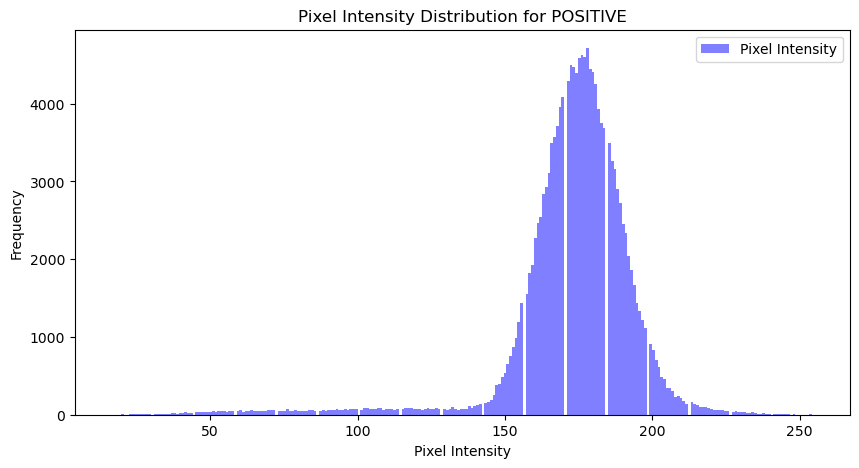

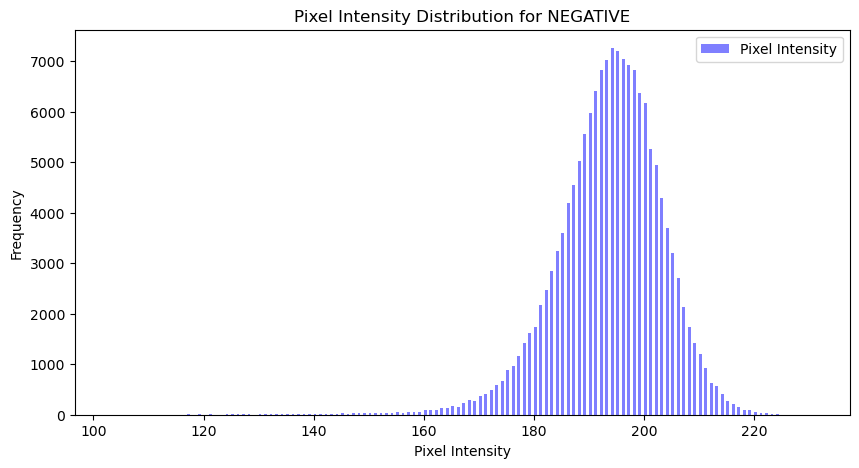

In [91]:
# ploting the distribution of pixel intensity 

def plot_pixel_distribution(dataframe, label):
    # Find the first image file path with the specified label from the dataframe
    img_path = dataframe[dataframe['Label'] == label]['Filepath'].iloc[0]
    # Open the image file at the retrieved path
    img = Image.open(img_path)
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    # Create a figure with a specific size
    plt.figure(figsize=(10, 5))
    # Plot a histogram of the pixel intensity values with 256 bins
    plt.hist(img_array.ravel(), bins=256, color='blue', alpha=0.5, label='Pixel Intensity')
    # Add a legend in the upper right corner
    plt.legend(loc='upper right')
    # Label the x-axis as 'Pixel Intensity'
    plt.xlabel('Pixel Intensity')
    # Label the y-axis as 'Frequency'
    plt.ylabel('Frequency')
    # Set the title to indicate the pixel intensity distribution for the given label
    plt.title(f'Pixel Intensity Distribution for {label}')
    # Display the plot
    plt.show()

# Plot the pixel intensity distribution for images labeled as 'POSITIVE'
plot_pixel_distribution(all_df, 'POSITIVE')
# Plot the pixel intensity distribution for images labeled as 'NEGATIVE'
plot_pixel_distribution(all_df, 'NEGATIVE')


In [7]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(
    # Sample 20,000 rows from the combined dataframe, using a fixed random seed for reproducibility
    all_df.sample(20000, random_state=1),
    # Set 70% of the data for training
    train_size=0.7,
    # Enable shuffling of the data before splitting
    shuffle=True,
    # Use a fixed random seed for reproducibility in shuffling and splitting
    random_state=1
)


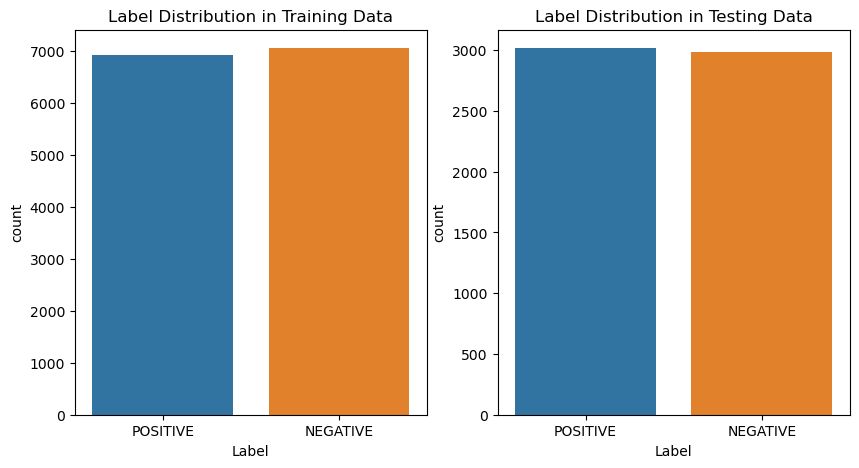

In [94]:
# Visualize the distribution of labels in the training dataset
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Label', data=train_df)
plt.title('Label Distribution in Training Data')

# Visualize the distribution of labels in the testing dataset
plt.subplot(1, 2, 2)
sns.countplot(x='Label', data=test_df)
plt.title('Label Distribution in Testing Data')
plt.show()


In [8]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,         # Continue normalizing image pixels to [0,1]
    validation_split=0.2,   # Keep the validation split to segregate training and validation data

    # Reduce the intensity of the augmentation parameters:
    rotation_range=10,      # Reduce rotation from 20 degrees to 10 degrees
    width_shift_range=0.1,  # Reduce width shift from 20% to 10% of total width
    height_shift_range=0.1, # Reduce height shift from 20% to 10% of total height
    shear_range=0.1,        # Reduce shearing from 0.2 to 0.1 radians
    zoom_range=0.1,         # Reduce zoom from 20% to 10%
    horizontal_flip=True,   # Keep horizontal flip as it generally does not distort image features
    fill_mode='nearest'     # Use 'nearest' to fill in new pixels from the nearest ones (least aggressive)
)


test_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [9]:
# Create a data generator for training data
train_data = train_gen.flow_from_dataframe(
    train_df,  # DataFrame containing training data
    x_col='Filepath',  # Column in DataFrame that contains the paths to the images
    y_col='Label',  # Column in DataFrame that contains the labels
    target_size=(120, 120),  # Dimensions to which all images found will be resized
    color_mode='rgb',  # Color mode of the images, here 3 color channels (red, green, blue)
    class_mode='binary',  # Type of label arrays that are returned: 'binary' means 1D binary labels
    batch_size=32,  # Size of the batches of data (number of images of each batch)
    shuffle=True,  # Shuffle the order of the data
    seed=42,  # Random seed for shuffling and transformations
    subset='training'  # Specify that this is training data
)

# Create a data generator for validation data
val_data = train_gen.flow_from_dataframe(
    train_df,  # DataFrame containing training data
    x_col='Filepath',  # Similar to above
    y_col='Label',  # Similar to above
    target_size=(120, 120),  # Similar to above
    color_mode='rgb',  # Similar to above
    class_mode='binary',  # Similar to above
    batch_size=32,  # Similar to above
    shuffle=True,  # Similar to above
    seed=42,  # Similar to above
    subset='validation'  # Specify that this is validation data
)

# Create a data generator for test data
test_data = test_gen.flow_from_dataframe(
    test_df,  # DataFrame containing testing data
    x_col='Filepath',  # Similar to above
    y_col='Label',  # Similar to above
    target_size=(120, 120),  # Similar to above
    color_mode='rgb',  # Similar to above
    class_mode='binary',  # Similar to above
    batch_size=32,  # Similar to above
    shuffle=False,  # Do not shuffle test data for consistent evaluation
    seed=42  # Random seed for any transformations
)


Found 11200 validated image filenames belonging to 2 classes.
Found 2800 validated image filenames belonging to 2 classes.
Found 6000 validated image filenames belonging to 2 classes.


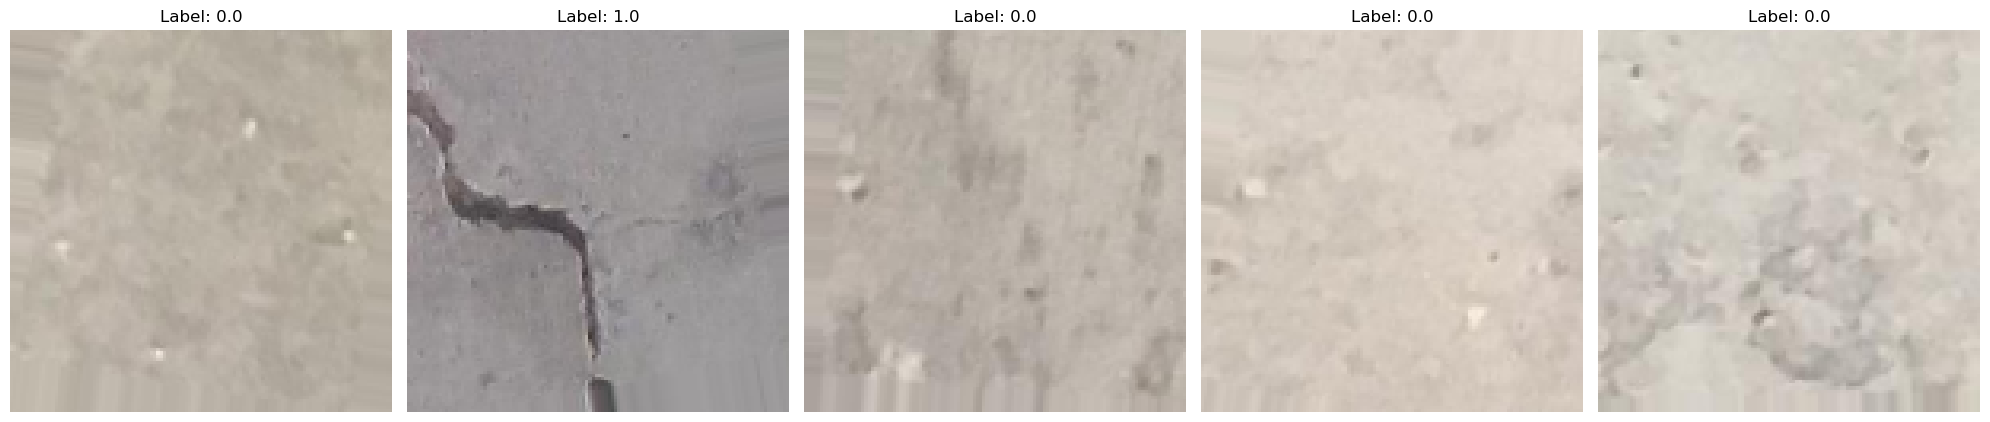

In [10]:
# Fetch a batch of images and labels
images, labels = next(train_data)

# Function to plot images in a grid
def plot_images(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax, lbl in zip(images_arr, axes, labels_arr):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Label: {lbl}")
    plt.tight_layout()
    plt.show()

# Display the first 5 images and labels from the batch
plot_images(images[:5], labels[:5])


In [11]:
# inputs = tf.keras.Input(shape=(120, 120, 3))
# x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
# x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
# x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
# x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# model = tf.keras.Model(inputs=inputs, outputs=outputs)

# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# print(model.summary())

In [12]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Configure the EarlyStopping callback
# early_stopping = EarlyStopping(
#     monitor='val_loss',  # Monitor the validation loss
#     min_delta=0.001,     # Define minimal amount of change to count as an improvement
#     patience=5,          # Number of epochs to wait before stopping, set to about a third of the total epochs
#     verbose=1,           # Print messages when stopping
#     mode='auto',         # Let the callback infer the mode
#     restore_best_weights=True  # Optional: restores model weights from the epoch with the best value of the monitored quantity.
# )
# history = model.fit(
#     train_data,
#     validation_data=val_data,
#     epochs=15,  # Set the number of epochs to 15
#     callbacks=[early_stopping]  # Include the EarlyStopping callback
# )


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the input layer
inputs = tf.keras.Input(shape=(120, 120, 3))

# Add the first convolutional block
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Add the second convolutional block
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Global average pooling to replace the flattening and dense layers
x = GlobalAveragePooling2D()(x)

# Output layer with a single neuron and sigmoid activation for binary classification
outputs = Dense(1, activation='sigmoid')(x)

# Create the model with specified inputs and outputs
cnn_model = Model(inputs=inputs, outputs=outputs)

# Compile the model with optimizer, loss, and metrics
cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print the model summary to see the full architecture and parameters
print(cnn_model.summary())


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 118, 118, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 59, 59, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 57, 57, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [20]:
# Define and construct the CNN model with specified input and output layers
cnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the CNN model to configure the learning process
cnn_model.compile(
    optimizer='adam',  # Use 'adam' optimizer for adaptive learning rate methods
    loss='binary_crossentropy',  # Use 'binary_crossentropy' for binary classification problems
    metrics=['accuracy']  # Evaluate model performance during training and testing with accuracy metric
)




In [21]:
# Import the EarlyStopping callback from TensorFlow Keras, used to stop training when a monitored metric has stopped improving
from tensorflow.keras.callbacks import EarlyStopping

# Create an instance of EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss during training
    min_delta=0.001,  # Minimum change in the monitored quantity to qualify as an improvement
    patience=5,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,  # Enable verbose mode to output messages about stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)



In [22]:
history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,  # Set the number of epochs to 15
    callbacks=[early_stopping]  # Include the EarlyStopping callback
)


Epoch 1/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 66s 183ms/step - accuracy: 0.6172 - loss: 0.6497 - val_accuracy: 0.8107 - val_loss: 0.4538
Epoch 2/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 64s 181ms/step - accuracy: 0.8937 - loss: 0.3775 - val_accuracy: 0.9464 - val_loss: 0.2151
Epoch 3/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 64s 180ms/step - accuracy: 0.9484 - loss: 0.2030 - val_accuracy: 0.9521 - val_loss: 0.1429
Epoch 4/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 65s 184ms/step - accuracy: 0.9612 - loss: 0.1324 - val_accuracy: 0.9771 - val_loss: 0.1072
Epoch 5/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 64s 180ms/step - accuracy: 0.9719 - loss: 0.0947 - val_accuracy: 0.9739 - val_loss: 0.0809
Epoch 6/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 66s 185ms/step - accuracy: 0.9724 - loss: 0.0941 - val_accuracy: 0.9832 - val_loss: 0.0719
Epoch 7/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 65s 183ms/step - accuracy: 0.9769 - loss: 0.0815 - val_accuracy: 0.9814 - val_loss: 0.0611
Epoch 8/15
350/350 ━━━━━━━━━━━━━━━━━━━━ 63s 179ms/step - accuracy: 0.9768 - loss: 0

In [23]:
# Plot training and validation loss over time using Plotly Express
fig = px.line(
    history.history,  # Data containing the history of loss values
    y=['loss', 'val_loss'],  # Plot the 'loss' and 'val_loss' from the history
    labels={'index': "Epoch", 'value': "Loss"},  # Label the axes
    title="Training and Validation Loss Over Time"  # Set the title of the graph
)

# Display the plot
fig.show()


In [24]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model1.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


  4/188 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.9642 - loss: 0.3830

C:\Users\ayoos\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.9694 - loss: 0.1279
Test Loss: 0.10241842269897461
Test Accuracy: 0.9743333458900452


In [26]:
import numpy as np

def predict_probabilities_for_negative_images(model, generator, num_images=3000):
    negative_images = []  # Initialize a list to store the negative images
    negative_labels = []  # Initialize a list to store the labels of the negative images
    
    # Loop until we collect enough negative images
    while len(negative_images) < num_images:
        images, labels = next(generator)  # Get the next batch of images and labels from the generator
        # Filter for negative images
        for img, lbl in zip(images, labels):
            if lbl == 0:  # Check if the label is 'Negative'
                negative_images.append(img)  # Append the image to the negative_images list
                negative_labels.append(lbl)  # Append the label to the negative_labels list
            if len(negative_images) >= num_images:  # Check if we have collected enough images
                break

    # Convert the list of negative images to a numpy array for prediction
    negative_images_array = np.array(negative_images)[:num_images]
    predictions = model.predict(negative_images_array)  # Predict the classes for these images
    print("Mean value:", np.mean(predictions))  # Print the mean value of the predictions
    

# Example usage, assuming 'train_data' is a properly configured generator and 'model1' is a trained model
predict_probabilities_for_negative_images(model1, train_data)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
Mean value: 0.061249156


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


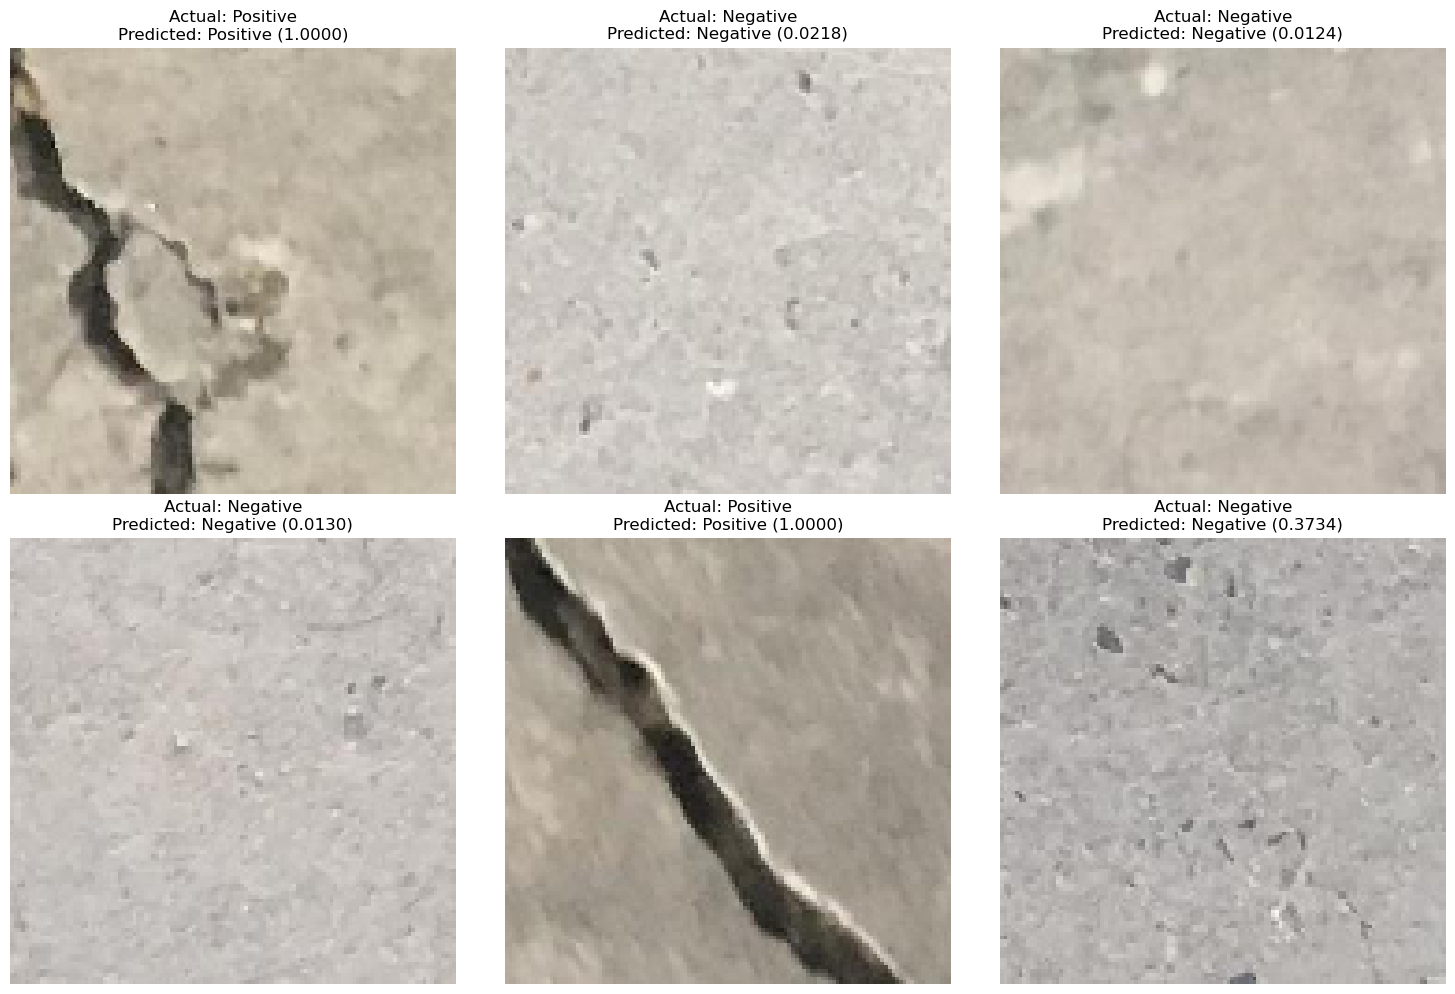

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def predict(model, generator, num_images=6):
    images_collected = []  # Initialize a list to store collected images
    labels_collected = []  # Initialize a list to store corresponding labels
    
    # Loop until the specified number of images is collected
    while len(images_collected) < num_images:
        images, labels = next(generator)  # Retrieve the next batch of images and labels from the generator
        # Iterate over images and labels in the current batch
        for img, lbl in zip(images, labels):
            images_collected.append(img)  # Append each image to the collection list
            labels_collected.append(lbl)  # Append each label to the label list
            if len(images_collected) >= num_images:  # Break loop if enough images are collected
                break

    # Convert the list of collected images to a NumPy array for prediction
    images_array = np.array(images_collected)[:num_images]
    predictions = model.predict(images_array)  # Use the model to predict the classes for the collected images
    
    # Setup the plot as a 2x3 grid to display 6 images
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Define the figure and subplots
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    for img, ax, lbl, pred in zip(images_array, axes, labels_collected, predictions):
        ax.imshow(img)  # Display each image
        ax.axis('off')  # Turn off axis labels and ticks
        actual_label = "Positive" if lbl == 1 else "Negative"  # Determine the actual label from the binary label
        # Calculate the predicted label based on a custom threshold of 0.42
        predicted_label = "Positive" if pred >= 0.42 else "Negative"
        # Display the actual and predicted labels along with the prediction probability
        ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label} ({pred:.4f})")
    plt.tight_layout()  # Adjust layout to make sure there is no overlap
    plt.show()  # Display the plot

# Example usage, assuming 'train_data' is properly configured
predict(cnn_model, test_data)


188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step


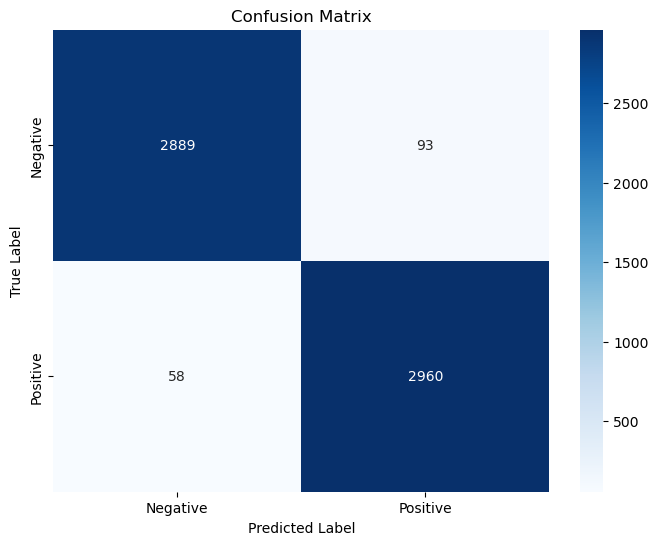

              precision    recall  f1-score   support

    Negative       0.98      0.97      0.97      2982
    Positive       0.97      0.98      0.98      3018

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

F1 Score for Negative Class: 0.97
F1 Score for Positive Class: 0.98


In [28]:
# Predict the labels on the test set
predictions = model1.predict(test_data)
predicted_classes = (predictions > 0.42).astype(int)  # Convert probabilities to binary predictions

# Get true labels
true_classes = test_data.labels

# Generate the confusion matrix
cm = confusion_matrix(true_classes, np.squeeze(predicted_classes))

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report = classification_report(true_classes, np.squeeze(predicted_classes), target_names=["Negative", "Positive"], output_dict=True)
print(classification_report(true_classes, np.squeeze(predicted_classes), target_names=["Negative", "Positive"]))

# Extract F1 scores for individual classes and print them
f1_negative = report['Negative']['f1-score']
f1_positive = report['Positive']['f1-score']
print(f"F1 Score for Negative Class: {f1_negative:.2f}")
print(f"F1 Score for Positive Class: {f1_positive:.2f}")

In [32]:
import tensorflow as tf

# Save the model in SavedModel format
tf.saved_model.save(model1, 'C:\\Users\\ayoos\\Desktop\\CONCRETE CRACK')


INFO:tensorflow:Assets written to: C:\Users\ayoos\Desktop\CONCRETE CRACK\assets


INFO:tensorflow:Assets written to: C:\Users\ayoos\Desktop\CONCRETE CRACK\assets


# Model2 Logistic Regression

In [33]:
import numpy as np

def extract_features_labels(generator, sample_count):
    # Initialize arrays to store the flattened image data and corresponding labels
    data = np.zeros((sample_count, 120*120*3))  # Image size is 120x120 with 3 color channels (RGB)
    labels = np.zeros((sample_count,))  # Initialize array for labels

    i = 0  # Initialize counter
    # Iterate over batches of images and labels from the generator
    for x_batch, y_batch in generator:
        batch_size = x_batch.shape[0]  # Get the number of images in the batch
        # Reshape and store the images in the data array
        data[i * batch_size:(i + 1) * batch_size] = x_batch.reshape(batch_size, -1)
        # Store the labels in the labels array
        labels[i * batch_size:(i + 1) * batch_size] = y_batch
        i += 1  # Increment the counter
        # Break the loop once enough samples are collected
        if (i + 1) * batch_size >= sample_count:
            break

    return data, labels  # Return the arrays containing the flattened images and labels

# Define the number of samples in training, validation, and test sets
num_train_samples = 11200
num_val_samples = 2800   
num_test_samples = 6000    

# Extract features and labels for training, validation, and test data
train_features, train_labels = extract_features_labels(train_data, num_train_samples)
val_features, val_labels = extract_features_labels(val_data, num_val_samples)
test_features, test_labels = extract_features_labels(test_data, num_test_samples)


In [34]:
print("Training features shape:", train_features.shape)
print("Training labels shape:", train_labels.shape)

print("Validation features shape:", val_features.shape)
print("Validation labels shape:", val_labels.shape)

print("Test features shape:", test_features.shape)
print("Test labels shape:", test_labels.shape)


Training features shape: (11200, 43200)
Training labels shape: (11200,)
Validation features shape: (2800, 43200)
Validation labels shape: (2800,)
Test features shape: (6000, 43200)
Test labels shape: (6000,)


In [35]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Start timing
start_time = time.time()

# Initialize and train the logistic regression
lr_model = LogisticRegression(max_iter=4000)
lr_model.fit(train_features, train_labels)

# End timing
end_time = time.time()

# Calculate the duration
duration = end_time - start_time
print(f"Training completed in {duration:.2f} seconds")

Training completed in 5598.06 seconds


Classification Report for Training Data:

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      5661
         1.0       0.99      0.98      0.99      5539

    accuracy                           0.99     11200
   macro avg       0.99      0.99      0.99     11200
weighted avg       0.99      0.99      0.99     11200

Confusion Matrix for Training Data:
 [[5594   67]
 [  95 5444]]


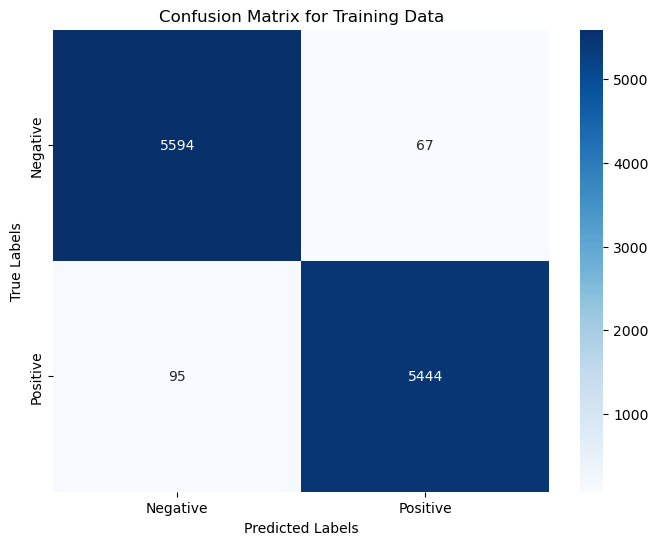

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the training data
train_predictions = lr_model.predict(train_features)

# Print classification report for the training data
print("Classification Report for Training Data:\n")
print(classification_report(train_labels, train_predictions))

# Print confusion matrix for the training data
train_cm = confusion_matrix(train_labels, train_predictions)
print("Confusion Matrix for Training Data:\n", train_cm)

# Visualizing the confusion matrix using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Training Data')
plt.show()


Classification Report for Validation Data:

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82      1432
         1.0       0.84      0.72      0.78      1368

    accuracy                           0.80      2800
   macro avg       0.80      0.80      0.80      2800
weighted avg       0.80      0.80      0.80      2800



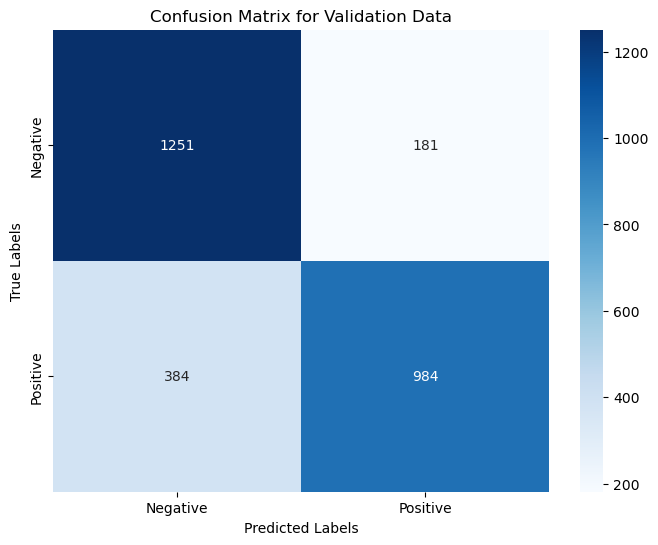

In [37]:
# Predict on the validation data
val_predictions = lr_model.predict(val_features)

# Print the classification report for the validation data
print("Classification Report for Validation Data:\n")
print(classification_report(val_labels, val_predictions))

# Generate the confusion matrix from the true labels and predictions
val_cm = confusion_matrix(val_labels, val_predictions)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Validation Data')
plt.show()

Classification Report for Test Data:

              precision    recall  f1-score   support

         0.0       0.76      0.87      0.81      3007
         1.0       0.85      0.72      0.78      2993

    accuracy                           0.80      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.80      0.80      0.80      6000

Confusion Matrix for Test Data:
 [[2625  382]
 [ 836 2157]]


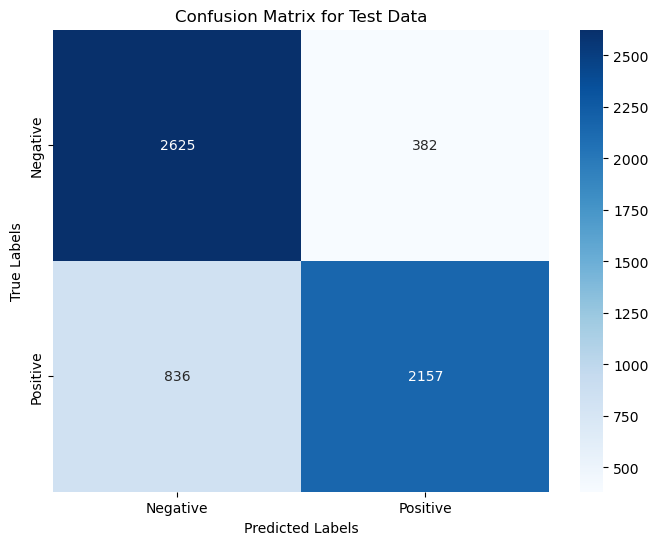

In [39]:
# Predict on the test data
test_predictions = lr_model.predict(test_features)  # Assuming you have already scaled your test features as well

# Print classification report for the test data
print("Classification Report for Test Data:\n")
print(classification_report(test_labels, test_predictions))

# Print confusion matrix for the test data
test_cm = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix for Test Data:\n", test_cm)

# heatmap visualization of a confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

# Model3 Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
dtree_model = DecisionTreeClassifier(max_depth=10)  

# Train the model
dtree_model.fit(train_features, train_labels)

DecisionTreeClassifier(max_depth=10)

In [41]:
train_predictions=dtree_model.predict(train_features)


Classification Report for Training Set:
               precision    recall  f1-score   support

         0.0       0.90      0.99      0.95      5661
         1.0       0.99      0.89      0.94      5539

    accuracy                           0.94     11200
   macro avg       0.95      0.94      0.94     11200
weighted avg       0.95      0.94      0.94     11200



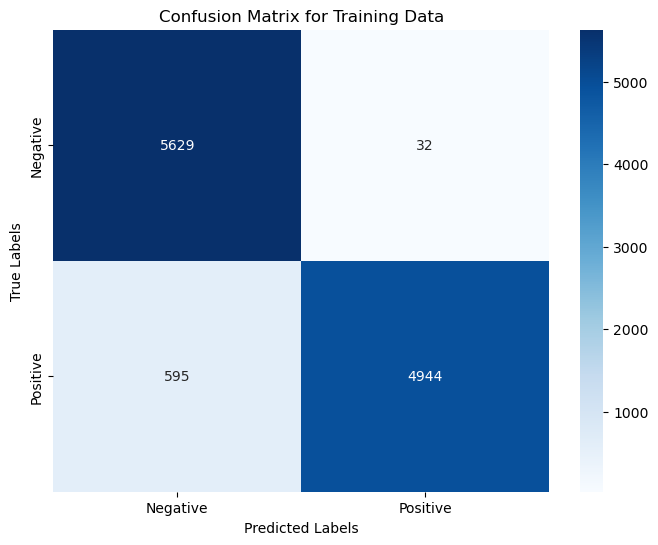

In [52]:
# Generate the classification report for the training set using predicted and true labels
train_dtree = classification_report(train_labels, train_predictions)
print("\nClassification Report for Training Set:\n", train_dtree)

# Compute the confusion matrix using the true and predicted labels
train_cm = confusion_matrix(train_labels, train_predictions)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')  # Label for the x-axis
plt.ylabel('True Labels')  # Label for the y-axis
plt.title('Confusion Matrix for Training Data')  # Title of the heatmap
plt.show()  # Display the heatmap


Classification Report (Validation Set):
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      1432
         1.0       0.93      0.79      0.86      1368

    accuracy                           0.87      2800
   macro avg       0.88      0.87      0.87      2800
weighted avg       0.88      0.87      0.87      2800



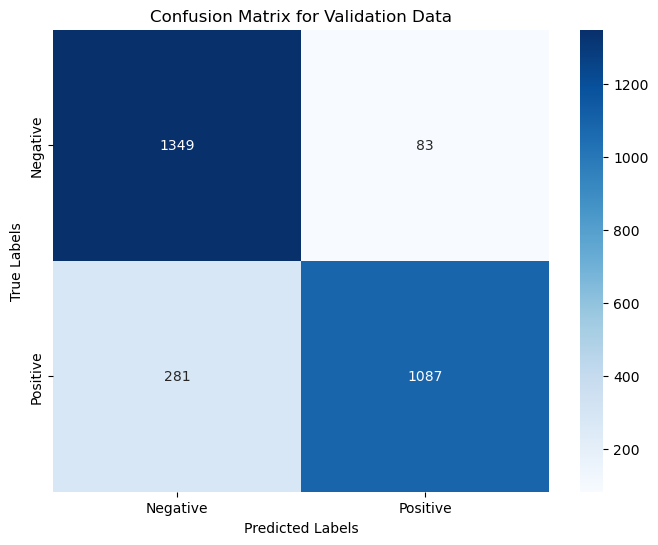

In [53]:
# Use the decision tree model to predict the validation set
val_predictions = dtree_model.predict(val_features)
# Print the classification report for the validation set, showing key metrics for each class
print("Classification Report (Validation Set):\n", classification_report(val_labels, val_predictions))

# Compute the confusion matrix for the validation data predictions
val_cm = confusion_matrix(val_labels, val_predictions)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))  # Set figure size for clarity
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],  # Define tick labels for x-axis
            yticklabels=['Negative', 'Positive'])  # Define tick labels for y-axis
plt.xlabel('Predicted Labels')  # Label for the x-axis
plt.ylabel('True Labels')  # Label for the y-axis
plt.title('Confusion Matrix for Validation Data')  # Title for the heatmap
plt.show()  # Display the heatmap


Classification Report (testing Set):
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.89      3007
         1.0       0.93      0.83      0.88      2993

    accuracy                           0.88      6000
   macro avg       0.89      0.88      0.88      6000
weighted avg       0.89      0.88      0.88      6000



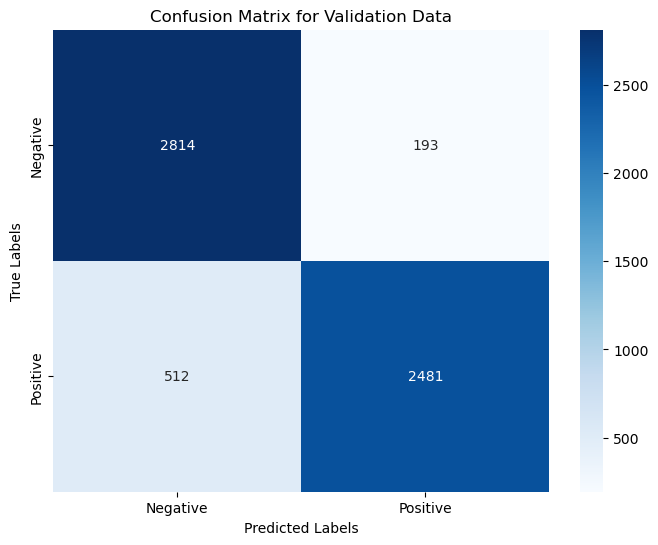

In [54]:
# Use the decision tree model to make predictions on the test dataset
test_predictions = dtree_model.predict(test_features)
# Print the classification report for the testing set, including key metrics such as precision and recall for each class
print("Classification Report (testing Set):\n", classification_report(test_labels, test_predictions))

# Compute the confusion matrix for the test data predictions
test_cm = confusion_matrix(test_labels, test_predictions)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))  # Define the figure size to ensure clarity in presentation
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'],  # Set custom tick labels for the x-axis
            yticklabels=['Negative', 'Positive'])  # Set custom tick labels for the y-axis
plt.xlabel('Predicted Labels')  # Label for the x-axis
plt.ylabel('True Labels')  # Label for the y-axis
plt.title('Confusion Matrix for Testing Data')  # Correct the title to reflect the data being visualized
plt.show()  # Display the heatmap
